

<center>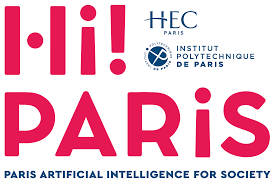</center>

___


### The Goal of this notebook is to optimise low rank estimation 🚀:
 
### Structure of the Script:
* <b>Input:</b> matrice
* <b>Output:</b> error_low_rank, error_empirical
* <b>Method:</b> 
    * generate_low_rank_samples():
        * has four parameters: d1,d2,K,n
        * returns tuple of (res, Y1/n, Y2/n)
    * generate_dirichlet_low_rank_samples(): 
        * has six parameters: d1,d2,K,n,diric1,diric2
        * returns tuple of (res,Y1/n, Y2/n)
    * our_algo():
        * has six parameters: n,Y1,Y2,alpha,cstar,Cbar
        * returns res/np.sum(res)
    * loss_calculation() - returns two values: error_low_rank, error_empirical

### Current Scope: 
This notebook is estimation procedure. But we have to do otimisation for multi-dimension density estimation procedure as well

-----

# Table Of Content
* I - [Import of Packages](#first-bullet)
* II - [generate_low_rank_samples](#second-bullet)
* III - [generate_dirichlet_low_rank_samples](#third-bullet)
* IV - [our_algo](#fourth-bullet)
* V - [loss_calculation](#fifth-bullet)


## I - Import of Packages <a class="anchor" id="first-bullet"></a>

In [2]:
#group 1
import sys # lets us access system-specific parameters and functions

#group 2
import numpy as np # Python library used for working with multi-dimensional array and matrix data structures
import matplotlib.pyplot as plt #functions that make matplotlib work like MATLAB

np.random.seed(1) 

## II - generate_low_rank_samples <a class="anchor" id="second-bullet"></a>

In [ ]:
K = 10
Cbar = .5
alpha = .1
cstar= alpha/10
beg = 100
end = 400
step = 20
error_low_rank  = np.zeros(len(range(beg,end,step)))
error_empirical = np.zeros(len(range(beg,end,step)))

for (i,d) in enumerate(range(beg,end,step)):
    d1 = d
    d2 = d
    n = int(10000*d*np.log(d)**2)
    diric1 = d1/(3*K)
    diric2 = d2/(3*K)
    (P,Y1,Y2) = generate_dirichlet_low_rank_samples(d1,d2,K,n, diric1,diric2)
    #(P,Y1,Y2) = generate_low_rank_samples(d1,d2,K,n, diric1,diric2)
    P_hat = our_algo(n,Y1,Y2,alpha,cstar,Cbar)
    error_low_rank[i] = np.sum(np.abs(P-P_hat))
    error_empirical[i] = np.sum(np.abs(P-Y2))

In [2]:
beg = 100
end = 400
step = 20
K = 10
for (i,d) in enumerate(range(beg,end,step)):
    n = int(10000*d*np.log(d)**2)

In [1]:
m = 1000000
n = 1000000

In [2]:
%time
res = np.zeros((m,n))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


NameError: name 'np' is not defined

In [ ]:
%time
zeros = np.empty((m, n))
zeros.fill(0)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.2 µs


In [7]:
d1 = d
d2 = d

In [ ]:
@njit
def for_loop_for_begin(d):
    res = np.zeros((d,d)) 
    for k in range(K): 
        u = np.random.rand(d,1) 
        res += 1/K * u.dot(u.T)
    return res
for_loop_for_begin(10000)

In [14]:
from numba import njit
import numpy as np

In [19]:
%%timeit
def for_loop_dot_product(d,K):
    res = np.zeros((d,d)) 
    for k in range(K): 
        u = np.random.rand(d,1) 
        res += 1/K * u.dot(u.T)
    return res
for_loop_dot_product(100,10)

330 µs ± 48.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [20]:
%%timeit
def for_loop_dot_product(d,K):
    res = np.zeros((d,d)) 
    for k in range(K): 
        res += 1/K * np.random.rand(d,1).dot(np.random.rand(d,1).T)
    return res
for_loop_dot_product(100,10)

297 µs ± 813 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [22]:
%%timeit
@njit
def for_loop_dot_product(d,K):
    res = np.zeros((d,d)) 
    for k in range(K): 
        res += 1/K * np.random.rand(d,1).dot(np.random.rand(d,1).T)
    return res
for_loop_dot_product(100,10)

279 ms ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
u = np.random.rand(d,1) 
res += 1/K * u.dot(u.T)

In [3]:
res += 1

NameError: name 'res' is not defined

In [4]:
test = 0
test += 1

In [10]:
list = [(k += 1) for k in [0,1]]

SyntaxError: invalid syntax (807001933.py, line 1)

In [23]:
%%timeit
def for_loop_dot_product(d,K):
    res = np.zeros((d,d)) 
    for k in range(K): 
        u = np.random.rand(d,1) 
        res += 1/K * u.dot(u.T)
    return res
for_loop_dot_product(20000,10)

KeyboardInterrupt: 

In [15]:
%%timeit
@njit
def for_loop_dot_product(d,K):
    res = np.zeros((d,d)) 
    for k in range(K): 
        u = np.random.rand(d,1) 
        res += 1/K * u.dot(u.T)
    return res
for_loop_dot_product(10000,10)

KeyboardInterrupt: 

In [14]:
%%timeit
@njit(parallel=True)
def for_loop_dot_product(d,K):
    res = np.zeros((d,d)) 
    for k in range(K): 
        u = np.random.rand(d,1) 
        res += 1/K * u.dot(u.T)
    return res
for_loop_dot_product(10000,10)

4.73 s ± 195 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
len(np.random.rand(d1,1))

380

In [19]:
u.dot(u.T)

(380, 380)

In [20]:
type(res)

numpy.ndarray

In [17]:
res = np.zeros((d,d)) 
for k in range(K): 
    u = np.random.rand(d,1) 
    res += 1/K * u.dot(u.T)
    print(res)

[[0.07446015 0.08408544 0.02453807 ... 0.06821008 0.00368802 0.05343473]
 [0.08408544 0.09495496 0.02771005 ... 0.07702744 0.00416476 0.06034211]
 [0.02453807 0.02771005 0.00808643 ... 0.02247839 0.00121537 0.01760922]
 ...
 [0.06821008 0.07702744 0.02247839 ... 0.06248463 0.00337845 0.0489495 ]
 [0.00368802 0.00416476 0.00121537 ... 0.00337845 0.00018267 0.00264663]
 [0.05343473 0.06034211 0.01760922 ... 0.0489495  0.00264663 0.03834629]]
[[0.08976948 0.11099893 0.02522986 ... 0.09412189 0.01508634 0.06999855]
 [0.11099893 0.14226835 0.02892619 ... 0.12257988 0.02420278 0.08946098]
 [0.02522986 0.02892619 0.00811769 ... 0.02364927 0.00173043 0.01835769]
 ...
 [0.09412189 0.12257988 0.02364927 ... 0.10634168 0.02267069 0.07698461]
 [0.01508634 0.02420278 0.00173043 ... 0.02267069 0.00866911 0.01497896]
 [0.06999855 0.08946098 0.01835769 ... 0.07698461 0.01497896 0.0562674 ]]
[[0.14404784 0.16505876 0.03665134 ... 0.10901006 0.08407615 0.10133133]
 [0.16505876 0.19611052 0.04030169 ... 

In [16]:
K

10

In [13]:
u = np.random.rand(d,1) 

In [15]:
res = np.zeros((d1,d2))

In [17]:
res.shape

(380, 380)

In [18]:
res

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
print(d1)
print(d2)

380
380


In [11]:
for (i,d) in enumerate(range(beg,end,step)):


0
100
next
1
120
next
2
140
next
3
160
next
4
180
next
5
200
next
6
220
next
7
240
next
8
260
next
9
280
next
10
300
next
11
320
next
12
340
next
13
360
next
14
380
next


In [2]:
def generate_low_rank_samples(d1,d2,K,n):
    '''
    The goal of this function is to generate two low-rank matrices with dimensions d1 and d2, 
    using a random combination of vectors u and v.
    
    parameters:
    ----
    d1: int
    size of the matrice 
    
    d2: int
    size of the matrice 
    
    K: int
    loop repetition
    
    n: int
    sample size
    
    Return:
    ----
    
    res,Y1/n, Y2/n : it is returned in tuple format
    
    res: numpy.ndarray
    a matrix of size d1 by d2
    
    Y1/n: numpy.ndarray
    a matrix obtained by generating a multinomial distribution with n samples 
    and a probability distribution derived from a low-rank matrix
    
    Y2/n: numpy.ndarray
    a matrix obtained by generating a multinomial distribution with n samples 
    and a probability distribution derived from a low-rank matrix
    
    '''
    res = np.zeros((d1,d2)) 
    for k in range(K): 
        u = np.random.rand(d1,1) 
        v = np.random.rand(d2,1)
        res += 1/K * u.dot(v.T)
    P = res/np.sum(res) 
    p = np.reshape(P,d1*d2)
    X  = np.random.multinomial(n,p)
    Y1 = np.reshape(X,(d1,d2)) 
    X  = np.random.multinomial(n,p)
    Y2 = np.reshape(X,(d1,d2)) 
    
    return(res,Y1/n, Y2/n)

## III - generate_dirichlet_low_rank_samples <a class="anchor" id="third-bullet"></a>

In [24]:
def generate_dirichlet_low_rank_samples(d1,d2,K,n,diric1,diric2):
    '''
    The goal of this function is to generate two low-rank matrices with dimensions d1 and d2, 
    using a random combination of vectors u and v, using Dirichlet distribution.
    
    parameters:
    ----
    d1: int
    size of the matrice  
    
    d2: int
    size of the matrice 
    
    K: int
    loop repetition
    
    n: int
    sample size
    
    diric1: float
    to apply dirichlet distribution
    
    diric2: float
    to apply dirichlet distribution
    
    Return:
    ----
    
    res,Y1/n, Y2/n : it is returned in tuple format
    
    res: numpy.ndarray
    a matrix of size d1 by d2
    
    Y1/n: numpy.ndarray
    a matrix obtained by generating a multinomial distribution with n samples 
    and a probability distribution derived from a low-rank matrix. Y1/n is used for scaling
    
    Y2/n: numpy.ndarray
    a matrix obtained by generating a multinomial distribution with n samples 
    and a probability distribution derived from a low-rank matrix. Y2/n is used for scaling
    
    '''
    res = np.zeros((d1,d2))
    for k in range(K):
        u = np.random.dirichlet(diric1*np.ones(d1),1)
        v = np.random.dirichlet(diric2*np.ones(d2),1)
        res += 1/K * u.T.dot(v)
    p = np.reshape(res,d1*d2)
    X  = np.random.multinomial(n,p)
    Y1 = np.reshape(X,(d1,d2))
    X  = np.random.multinomial(n,p)
    Y2 = np.reshape(X,(d1,d2))
    
    return(res,Y1/n, Y2/n)

In [ ]:
res = np.zeros((d1,d2))
for k in range(K):
        u = np.random.dirichlet(diric1*np.ones(d1),1)

## IV - our_algo <a class="anchor" id="fourth-bullet"></a>

In [25]:
def our_algo(n,Y1,Y2,alpha,cstar,Cbar):
    '''
    The goal of this function is to return low rank matrix using singular value decomposition and thresholding
    
    parameters:
    ----
    
    n: int
    sample size
    
    Y1: numpy.ndarray
    a matrix obtained by generating a multinomial distribution with n samples 
    and a probability distribution derived from a low-rank matrix
    
    Y2: numpy.ndarray
    a matrix obtained by generating a multinomial distribution with n samples 
    and a probability distribution derived from a low-rank matrix
    
    alpha: float
    tuning parameter
    
    cstar: float
    a constant
    
    Cbar: float
    tuning parameter
    
    Return:
    ----
    
    res/np.sum(res): numpy.ndarray
    for scaling the res matrix

    
    '''
    (d1,d2) = np.shape(Y1) 
    d = max(d1,d2) 

    if (n <= d*np.log(d)):
        return((Y1+Y2)/2)
      
    else:
        res = np.zeros((d1,d2))
        T = int(np.log(d)/np.log(2))
        p = np.sum(Y1, axis=1)
        q = np.sum(Y1, axis=0)

        for t in range(T+1): 
            if (t<T):
                I = np.argwhere((p <= 2**(-t)) & (p > 2**(-t-1)))

            else: 
                I = np.argwhere((p <= 2**(-t)))

            for u in range(T+1): 
                if (u<T):
                    J = np.argwhere((q <= 2**(-u)) & (q > 2**(-u-1))) 
                else: 
                    J = np.argwhere(q <= 2**(-u))
                #M = np.zeros(np.shape(Y2))  
                M = np.zeros((len(I),len(J))) 
                #for i in range(len(I)): 
                #    for j in range(len(J)): 
                #        M[i,j] = Y2[I[i],J[j]]
                row_indices = np.zeros(Y2.shape[0], dtype=bool)
                row_indices[I] = True
                col_indices = np.zeros(Y2.shape[1], dtype=bool)
                col_indices[J] = True
                M = Y2[row_indices, :][:, col_indices]

                if (np.sum(M) < 2*Cbar*alpha*np.log(d)/(n*np.log(2))):

                    for i in range(len(I)): # +1
                        for j in range(len(J)):
                            res[I[i],J[j]] = Y2[I[i],J[j]]  

                else:
                    #print((t,u))
                    tau = np.log(d) * np.sqrt(cstar * 2**(1-min(t,u))/n)
                    U,s,Vh = np.linalg.svd(M)
                    l = len(s[s>=tau])
                    #l = 5
                    H = np.dot(U[:,:l]*s[:l], Vh[:l,:])
                    for i in range(len(I)):  # +2
                        for j in range(len(J)):
                            res[I[i],J[j]] = H[i,j]


        return(res/np.sum(res))

## V - loss_calculation  <a class="anchor" id="fifth-bullet"></a>

In [26]:
def loss_calculation():
    '''
    The goal of this function is to is to evaluate the performance of an algorithm for matrix completion
    in the context of low-rank matrix recovery.
    
    Return:
    ----
    error_low_rank: numpy.ndarray
    measure the error difference
    
    error_empirical: numpy.ndarray
    measure the error difference
    

    '''
    
    K = 10
    Cbar = .5
    alpha = .1
    cstar= alpha/10
    beg = 100
    end = 400
    step = 20

    error_low_rank  = np.zeros(len(range(beg,end,step)))
    error_empirical = np.zeros(len(range(beg,end,step)))

    for (i,d) in enumerate(range(beg,end,step)):
        d1 = d
        d2 = d
        n = int(10000*d*np.log(d)**2)
        diric1 = d1/(3*K)
        diric2 = d2/(3*K)
        (P,Y1,Y2) = generate_dirichlet_low_rank_samples(d1,d2,K,n, diric1,diric2)
        #(P,Y1,Y2) = generate_low_rank_samples(d1,d2,K,n, diric1,diric2)
        P_hat = our_algo(n,Y1,Y2,alpha,cstar,Cbar)
        error_low_rank[i] = np.sum(np.abs(P-P_hat))
        error_empirical[i] = np.sum(np.abs(P-Y2))
    return error_low_rank, error_empirical

error_low_rank, error_empirical = loss_calculation()

In [27]:
K = 10
Cbar = .5
alpha = .1
cstar= alpha/10
beg = 100
end = 400
step = 20

error_low_rank  = np.zeros(len(range(beg,end,step)))
error_empirical = np.zeros(len(range(beg,end,step)))

for (i,d) in enumerate(range(beg,end,step)):
    d1 = d
    d2 = d
    n = int(10000*d*np.log(d)**2)
    diric1 = d1/(3*K)
    diric2 = d2/(3*K)
    (P,Y1,Y2) = generate_dirichlet_low_rank_samples(d1,d2,K,n, diric1,diric2)
    #(P,Y1,Y2) = generate_low_rank_samples(d1,d2,K,n, diric1,diric2)
    P_hat = our_algo(n,Y1,Y2,alpha,cstar,Cbar)
    error_low_rank[i] = np.sum(np.abs(P-P_hat))
    error_empirical[i] = np.sum(np.abs(P-Y2))

In [29]:
Y1.shape

(380, 380)

In [32]:
generate_dirichlet_low_rank_samples(d1,d2,K,n, diric1,diric2).shape

AttributeError: 'tuple' object has no attribute 'shape'

In [30]:
Y2.shape

(380, 380)

In [6]:
error_empirical

array([0.01743832, 0.01824569, 0.01899521, 0.01981143, 0.02054256,
       0.02132932, 0.02180567, 0.02242206, 0.0230209 , 0.02351987,
       0.02417923, 0.02469092, 0.02519046, 0.02560164, 0.02610438])

In [7]:
error_low_rank

array([0.01649803, 0.01675623, 0.01637163, 0.01871589, 0.01915634,
       0.01957766, 0.01955585, 0.01962921, 0.01613969, 0.01915771,
       0.02198956, 0.02273926, 0.02293212, 0.02306473, 0.0232231 ])

In [23]:
K = 10
Cbar = .5
alpha = .1
cstar= alpha/10
beg = 100
end = 400
step = 20
error_low_rank  = np.zeros(len(range(beg,end,step)))
error_empirical = np.zeros(len(range(beg,end,step)))

for (i,d) in enumerate(range(beg,end,step)):
    d1 = d
    d2 = d
    n = int(10000*d*np.log(d)**2)
    diric1 = d1/(3*K)
    diric2 = d2/(3*K)
    (P,Y1,Y2) = generate_dirichlet_low_rank_samples(d1,d2,K,n, diric1,diric2)
    #(P,Y1,Y2) = generate_low_rank_samples(d1,d2,K,n, diric1,diric2)
    P_hat = our_algo(n,Y1,Y2,alpha,cstar,Cbar)
    error_low_rank[i] = np.sum(np.abs(P-P_hat))
    error_empirical[i] = np.sum(np.abs(P-Y2))

NameError: name 'generate_dirichlet_low_rank_samples' is not defined

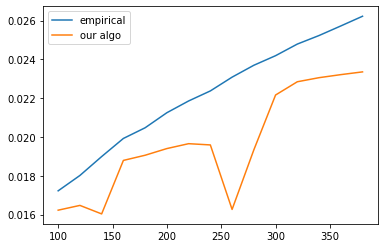

In [10]:
plt.plot(range(beg,end,step), error_empirical, label='empirical')
plt.plot(range(beg,end,step), error_low_rank, label = 'our algo')
plt.legend(loc="upper left")
plt.show()